In [52]:
import pandas as pd
import numpy as np
from skimage.io import imread, imshow
from skimage.color import rgba2rgb
from skimage.transform import resize
from skimage.filters import sobel
import os
import matplotlib.pyplot as plt
%matplotlib inline

'''
This notebook is for exploring different image feature extraction techniques.
'''
IMAGE_FOLDER = '../data/images/images'

In [3]:
'''
Iterate through the images to get their size. 
'''
images = os.listdir(IMAGE_FOLDER)
image_sizes = []
for image_file in images:
    image = imread('{}/{}'.format(IMAGE_FOLDER, image_file))
    if len(image.shape) == 2:
        height, width  = image.shape
        shape = (height, width, 0)
    else:
        shape = image.shape
    height, width, channels = shape
    image_sizes.append([height, width, channels])

image_df = pd.DataFrame(image_sizes, columns=['height', 'width', 'channels'])
image_df.describe()

,height,width,channels
count,8873.000000,8873.000000,8873.000000
mean,26.235321,25.549532,3.597205
std,205.717365,203.828911,0.975027
min,4.000000,15.000000,0.000000
25%,15.000000,15.000000,4.000000
50%,15.000000,15.000000,4.000000
75%,15.000000,15.000000,4.000000
max,7200.000000,6810.000000,4.000000


In [36]:
'''
Most of the images are 4 channel (RGBA). No important difference between RGB and RGBA.
Indicator variable colored = 1/0  could be relevent to price.
'''

num_greyscale = len(image_df[image_df.channels == 0])
print('Percentage of greyscale: {}'.format(num_greyscale/len(image_df)))

large_images = len(image_df[(image_df.height > 200)|(image_df.width > 200)])
print('Number fo large images: {}'.format(large_images))

Percentage of greyscale: 0.05916826327059619
Number fo large images: 44


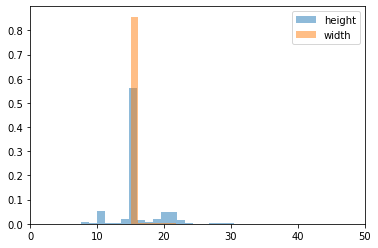

In [38]:
plt.hist(image_df['height'].to_numpy(), bins=6000, alpha=0.5, label='height', density=True)
plt.hist(image_df['width'].to_numpy(), bins=6000, alpha=0.5, label='width', density=True)
plt.legend(loc='upper right')
plt.xlim([0, 50])
plt.show()

(14, 15, 3)
(14, 15, 3)


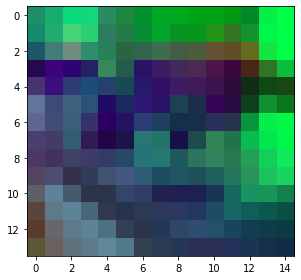

In [39]:
sample_image = 'ffc14dfa2038d68cf4f67ad39906addd.gif'
image = imread('{}/{}'.format(IMAGE_FOLDER, sample_image))
image = rgba2rgb(image)
print(image.shape)
testimage = resize(image, (15, 15))
print(image.shape)

imshow(image)

In [40]:
'''
FEATURE EXTRACTION: Mean RGB Value
'''

height, width, channels = image.shape
mean_pixel_matrix = np.zeros((height, width))

for h in range(height):
    for w in range(width):
        mean_pixel_matrix[h][w] = (image[h][w][0] + image[h][w][1] + image[h][w][2])/channels

mean_pixel_matrix = mean_pixel_matrix.reshape(height * width, -1)


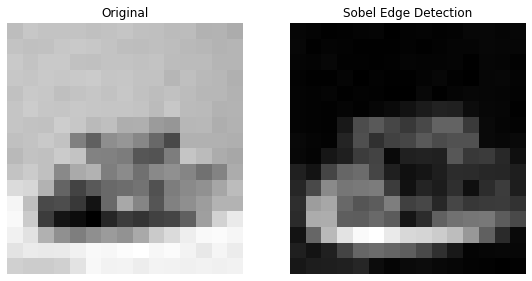

In [54]:
'''
FEATURE EXTRACTION: Edges (Sobel edge detection)
'''

# Find an image we can use that has more distinguishable edges
sample_image = 'fec874e713388b45ef26c4373aba16a5.jpg'
image = imread('{}/{}'.format(IMAGE_FOLDER, sample_image), as_gray=True)

edge_sobel = sobel(image)

fig, axes = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(8, 4))
axes[0].imshow(image, cmap=plt.cm.gray)
axes[0].set_title('Original')

axes[1].imshow(edge_sobel, cmap=plt.cm.gray)
axes[1].set_title('Sobel Edge Detection')

for ax in axes:
    ax.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
'''
TODO: Object detection (Feature: count objects)
'''